# Ec 143 - Problem Set 1
# Demand estimation and instrumental variables
Due by 5PM on February 7th. The GSI, Mengsi Gao (mengsi.gao@berkeley.edu) will handle the logistics of problem set collection.    

Working with peers on the problem set is actively encourage, but everyone needs to turn in their own Jupyter Notebook and any other accompanying materials.    

This problem set reviews the material on supply and demand models, excise taxation and the method of instrumental variables developed in lecture.

In [53]:
# Load libraries
import numpy as np  
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

The datafiles needed to complete this problem set are available on the course GitHub repository.

In [54]:
data = '/Users/bgraham/Dropbox/Teaching/Berkeley_Courses/Ec143/Ec143_Spring2022/Datasets/'
graphics = '/Users/bgraham/Dropbox/Teaching/Berkeley_Courses/Ec143/Ec143_Spring2022/Graphics/'

## Part 1: Understanding equilibrium price and quantity data

The basic setting is as described in lecture. In each of $ i = 1 \ldots N$ markets we observe the market-clearing price and quantity pair $ (P_i, Q_i). $ The demand schedule in market $i$ is given by

$$ \ln Q_i^d(p) = \alpha_{d0} + \beta_{d0} \ln p + U_{di}, $$

while the corresponding supply schedule is

$$ \ln Q_i^s(p) = \alpha_{s0} + \beta_{s0} \ln p + U_{si}. $$

Marking clearing implies that

$$ Q_i = Q_i^d(P_i) = Q_i^s(P_i). $$

Here $U_{di}$ is a market-specific demand shock and $U_{si}$ a market-specific supply shock. We assume that the supply and demand schedules are otherwise homogenous across markets.    

Depending on the application, "markets" might be different cities (e.g., orange sales in 2021 across a sample of US cities) or perhaps different time periods within the same geographic region (e.g., monthly orange sales in Northern California from January 2010 to December 2021).    

Solving for the (log of) the market-clearing price, $\ln P_i$, yields

$$ \ln P_i = -\frac{\alpha_{s0}-\alpha_{d0}}{\beta_{s0}-\beta_{d0}} -\frac{U_{si}-U_{di}}{\beta_{s0}-\beta_{d0}}. $$

To get the corresponding market clearing (log-) quantity, $\ln Q_i$, we can substitute this expression for $\ln P_i$ into either the demand or supply schedule given above.   

Observe how the market-clearing price depends on the demand and supply elasiticies, $\beta_{d0}$ and  $\beta_{s0}$, as well as the magnitudes of the supply and demand shocks, respectively $U_{di}$ and $U_{si}$. 

### Simulating a simple demand and supply system
The next block of code simulates $N = 100$ pairs $(\ln P_i, \ln Q_i)$ for the system outlined above. The demand and supply shocks are independently distributed mean zero normal random variables. Other parameters are as specified in the code block.


Three cases are considered. First, a setting where the variances of the demand and supply shocks are equal. Second, a setting where the variance of the demand shocks is small relative to that of the supply shocks. Third, the opposite case where the variance of the supply shocks is small relative to that of the demand shocks.

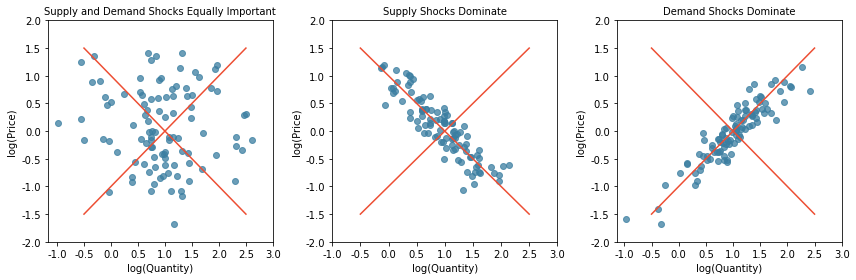

In [55]:
N = 100             # Number of markets to simulate

alpha_d =  1        # Demand and supply schedule parameters
beta_d  = -1
alpha_s =  1
beta_s  =  1

# Define figure object with three subplots
fig_supply_demand, sbp = plt.subplots(ncols=3, figsize=(12, 4))
ax0 = sbp[0] # Handle for left subplot
ax1 = sbp[1] # Handle for middle subplot
ax2 = sbp[2] # Handle for right subplot

#------------------------------------------------------#
#- CASE 1: SUPPLY AND DEMAND SHOCKS EQUALLY IMPORTANT -# 
#------------------------------------------------------#

plt.axes(ax0) # Select first subplot

# Simulate market clearing price quantity pairs for *Case 1*
U_d = np.random.normal(loc=0.0, scale=1.0, size=(N,))
U_s = np.random.normal(loc=0.0, scale=1.0, size=(N,))

logP = -(alpha_s-alpha_d)/(beta_s - beta_d) - (U_s - U_d)/(beta_s - beta_d)
logQ = alpha_s + beta_s*logP + U_s

# Draw scatter plot and underlying supply and demand schedules
ax0.scatter(logQ , logP, color = '#3B7EA1', alpha = 0.75)
plt.plot((alpha_s + beta_s*-1.5, alpha_s + beta_s*1.5), (-1.5, 1.5), color='#ED4E33')
plt.plot((alpha_d + beta_d*-1.5, alpha_d + beta_d*1.5), (-1.5, 1.5), color='#ED4E33')

ax0.set_title('Supply and Demand Shocks Equally Important', fontsize=10)
ax0.set_xlabel(r'log(Quantity)')
ax0.set_ylabel(r'log(Price)')
ax0.set_xticks([-1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3])
ax0.set_xticklabels(['-1.0', '-0.5', '0.0', '0.5', '1.0', '1.5', '2.0', '2.5', '3.0'])
ax0.set_yticks([-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2])
ax0.set_yticklabels(['-2.0', '-1.5', '-1.0', '-0.5', '0.0', '0.5', '1.0', '1.5', '2.0'])

#------------------------------------------------------#
#- CASE 2: SUPPLY SHOCKS DOMINATE                     -# 
#------------------------------------------------------#

plt.axes(ax1) # Select second subplot

# Simulate market clearing price quantity pairs for *Case 2*
U_d = np.random.normal(loc=0.0, scale=0.25, size=(N,))
U_s = np.random.normal(loc=0.0, scale=1.0, size=(N,))

logP = -(alpha_s-alpha_d)/(beta_s - beta_d) - (U_s - U_d)/(beta_s - beta_d)
logQ = alpha_s + beta_s*logP + U_s

# Draw scatter plot and underlying supply and demand schedules
ax1.scatter(logQ , logP, color = '#3B7EA1', alpha = 0.75)
plt.plot((alpha_s + beta_s*-1.5, alpha_s + beta_s*1.5), (-1.5, 1.5), color='#ED4E33')
plt.plot((alpha_d + beta_d*-1.5, alpha_d + beta_d*1.5), (-1.5, 1.5), color='#ED4E33')

ax1.set_title('Supply Shocks Dominate', fontsize=10)
ax1.set_xlabel(r'log(Quantity)')
ax1.set_ylabel(r'log(Price)')
ax1.set_xticks([-1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3])
ax1.set_xticklabels(['-1.0', '-0.5', '0.0', '0.5', '1.0', '1.5', '2.0', '2.5', '3.0'])
ax1.set_yticks([-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2])
ax1.set_yticklabels(['-2.0', '-1.5', '-1.0', '-0.5', '0.0', '0.5', '1.0', '1.5', '2.0'])

#------------------------------------------------------#
#- CASE 3: DEMAND SHOCKS DOMINATE                     -# 
#------------------------------------------------------#

plt.axes(ax2) # Select third subplot

# Simulate market clearing price quantity pairs for *Case 3*
U_d = np.random.normal(loc=0.0, scale=1.0, size=(N,))
U_s = np.random.normal(loc=0.0, scale=0.25, size=(N,))

logP = -(alpha_s-alpha_d)/(beta_s - beta_d) - (U_s - U_d)/(beta_s - beta_d)
logQ = alpha_s + beta_s*logP + U_s

# Draw scatter plot and underlying supply and demand schedules
ax2.scatter(logQ , logP, color = '#3B7EA1', alpha = 0.75)
plt.plot((alpha_s + beta_s*-1.5, alpha_s + beta_s*1.5), (-1.5, 1.5), color='#ED4E33')
plt.plot((alpha_d + beta_d*-1.5, alpha_d + beta_d*1.5), (-1.5, 1.5), color='#ED4E33')

ax2.set_title('Demand Shocks Dominate', fontsize=10)
ax2.set_xlabel(r'log(Quantity)')
ax2.set_ylabel(r'log(Price)')
ax2.set_xticks([-1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3])
ax2.set_xticklabels(['-1.0', '-0.5', '0.0', '0.5', '1.0', '1.5', '2.0', '2.5', '3.0'])
ax2.set_yticks([-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2])
ax2.set_yticklabels(['-2.0', '-1.5', '-1.0', '-0.5', '0.0', '0.5', '1.0', '1.5', '2.0'])

fig_supply_demand.tight_layout()  
# plt.savefig(graphics + 'fig_supply_demand', bbox_inches='tight', dpi=500) 

### Commentary
Provide a short description of the main components of the code block above and how they collectively produce the three figures. Next discuss the figures themselves. What implications do these simulations have for understanding the structure of demand and supply in real world settings? Can you think of possible real world markets which might be qualitatively similar to each of the three simulated cases? Please place you answer in a separate markdown box immediately below this one.


**ANSWER**

In the code block above, we examine the three scenarios: 1) the setting where the variances of supply and demand shocks are equal; 2) the setting where the variance of supply shocks is greater than that of demand shocks; 3) the setting where the variance of demand shocks is greater than that of supply shocks. Specifically, in 1) we set both $U_d$ and $U_s$ to $N(0, 1)$; in 2) we set $U_s$ to $N(0, 1)$ and $U_d$ to $N(0, \frac{1}{4})$; in 3) we set $U_s$ to $N(\frac{1}{4})$ and $U_d$ to $N(0,1)$. We set $\Beta_{d0}=-1$ and $\alpha_{s0}=\alpha_{d0} = \Beta_{s0}=1$. This leaves the following set of market-clearing prices and quantities:

\begin{align*}
    \ln P_i &= - \frac{U_{si}-U_{di}}{2}& \\
    \ln Q_i &= Q_{si}(\ln P_i) = Q_{si}{\ln P_i}& 
\end{align*}

For each case, we scatter-plot the pairs ($\ln Q_i$, $\ln P_i$). To better understand our scatter-plots, we also underlay the data with supply and demand schedules excluding their respective shocks ($\ln Q_{si} = \alpha_s + \beta_s \ln P_i$) from log prices -1.5 to 1.5.

When we examine our figures, we see that patterns appear when either the variance of supply or demand shocks are greater than that of the other. In a market where supply shocks dominate, the market clearing data points closely follow the *demand* schedule.
In a market where demand shocks dominate, the market clearing levels closely follow the *supply* schedule. 

We can argue that the market for water represents one where supply shocks dominate. Water is a basic necessity and utility, and consumers' demand will generally not shift. However, natural effects like droughts or storms can create supply shocks that affect how suppliers will price a given quantity of water. 

We can also argue that the market for 'fast fashion' represents a market where demand shocks dominate. The manufacturing process for inexpensive clothing has been greatly refined and standardized in the last decades, so there is not much that can dramatically shift suppliers' pricing for a given quantity. However, consumers are incredibly fickle about what type of clothing they want (fashion trends and all that); the demanded price in a market for some article of clothing (jean shorts, for example) can easily change quickly and dramatically.

### Understanding the properties of OLS when prices are endogenous
Solve for the probability limit of the coefficient on $\ln P_i$ in the OLS fit of $\ln Q_i$ onto a constant and $\ln P_i$. Outline a set of conditions under which:

$$ \hat{\beta} \approx \beta_{d0}. $$

A second set of conditions where

$$ \hat{\beta} \approx \beta_{s0}. $$

Finally a set of conditions where

$$ \hat{\beta} \approx \frac{\beta_{d0} + \beta_{s0}}{2}. $$

In light of your answers, revist the three figures discussed earlier.    

If you know how to write in LaTex you may place your answers in a markdown box immediately below this one. If you do not know LaTex, you may handwrite your answers for this question neatly and turn them in to the GSI.

We know that $\hat{\beta} = \beta$ if $cov(X, U) = 0$. For the entirety of the answer, we will assume that the exogenous regressors do not correlate with the error term, i.e. $cov(X, U) = 0$. Observe that when $\hat{\beta} \approx \beta_{d0}$, the market data closely follows the demand schedule; so, we want to condition for a market where supply shocks dominate. Vice-versa for $\hat{\beta} \approx \beta_{d0}$: the market closely follows the supply schedule and so we condition for a market where demand shocks dominate. Lastly, if we desire a set of conditions where $\hat{\beta} \approx \frac{\beta_{d0} + \beta_{s0}}{2}$, we can observe that the market won't really follow either schedule (if $\beta_{d0}$ and $\beta_{s0}$ are similar, then $\hat{\beta} \approx 0$). We can relate our points to their corresponding figures 3, 2, and 1, respectively, from the previous part.

### Excise Taxes
Assume the demand and supply system outlined above characterizes the market for automobile gasoline across US metropolitan areas. In this example the "price" corresponds to the price of a gallon of gasoline, and the "quantity" to the total number of gallons sold in a market. To be concrete a "market" might be the San Francisco Bay Area in the first quarter of 2022.    

Answer the following questions in a markdown box immediately below this one. If you do not know LaTex, you may handwrite your answers for this question neatly and turn them in to the GSI.   
1. Explain how knowledge of $\beta_{d0}$ and $\beta_{s0}$ could be used to predict the likely equilibrium price and quantity effects of an increase in the gasoline excise tax (to learn more about the gasoline excise tax consult the 2009 Congressional Research Services report _The Role of Federal Gasoline Excise Taxes in Public Policy_ by Robert Pirog (available online at https://crsreports.congress.gov/).   
2. When is the burden of an excise tax primarily bourne by consumers? By producers?    
3. List two possible benefits of a gasoline excise tax? List two possible downsides.

**ANSWER**

1. Information about price elasticity of demand and price elasticity of supply is important, because they represent how both sides of the market will react when prices change (excise tax). This is represented in our model as they serve as the slope variables as direct multipliers of price ($\Beta_{si} \log P_i$ and $\Beta_{di} \log P_i$)  because we can learn how aggressively up or down the supply / demand schedule the market clearing price will move.

2. The burden of an excise tax is primarily bourne by consumers when $\Beta_{s0} >> \Beta_{d0}$. Producers bear most of the burden when $\Beta_{s0} << \Beta_{d0}$.

3. A gasoline excise tax can be beneficial if our goals are to reduce the supply of gasoline without inflicting too high of costs onto households (i.e. to help with climate change) (assuming $\Beta_{s0} >> \Beta_{d0}$). However, two downsides are that we can indeed inflict a severe cost onto households (assuming $\Beta_{s0} << \Beta_{d0}$) or that we take off too much gasoline from the market.

## Part 2: Estimating the price elasticity of demand by the method of instrumental variables
The next block of code loads a sample of records from the 2001 National Household Travel Survey (NHTS). This is sample was used by Richard Blundell, Joel L. Horowitz and Matthias Parey in their 2012 _Quantitative Economics_ paper "Measuring the price responsiveness of gasoline demand: economic shape restrictions and nonparametric demand estimation" (available online at https://qeconomics.org/). Only a subset of the data used in their paper is included in the file below. This is because NHTS survey data for households in small states is not released for confidentiality reasons. The sample below includes data from the 34 largest states in the US.

In [7]:
gas = pd.read_csv ('Blundell_etal_QE2012_gasoline_demand_data.csv')
gas[0:5]

,log_q,log_p,log_y,share,log_hhsize,log_driver,log_hhr_age,total_wrkr,publictransit_d,cl5_smtown_d,...,cl5_urban_d,popdensity_d2,popdensity_d3,popdensity_d4,popdensity_d5,popdensity_d6,popdensity_d7,popdensity_d8,state_fips,distance_oil1000
0,8.143545,0.229807,9.433484,0.346410,1.609438,1.386294,3.465736,3,0,0,...,0,0,0,1,0,0,0,0,1,0.657088
1,8.034972,0.229909,11.119883,0.057556,1.098612,0.693147,3.610918,1,0,0,...,0,0,0,0,1,0,0,0,1,0.657088
2,7.608235,0.229826,10.768485,0.053374,1.098612,0.693147,3.258097,2,0,1,...,0,0,1,0,0,0,0,0,1,0.657088
3,7.452868,0.229807,11.695247,0.018087,1.098612,0.693147,3.465736,2,0,1,...,0,1,0,0,0,0,0,0,1,0.657088
4,7.807454,0.229786,11.695247,0.025784,1.386294,1.098612,3.931826,2,0,1,...,0,1,0,0,0,0,0,0,1,0.657088


The next block of code imports a concordance of state FIPS (Federal Information Processing Standard) codes to state names and postal code abbrevations.

In [8]:
fips = pd.read_csv ('State_Fips_Codes.csv')
fips[0:5]

,Name,Postal_Code,state_fips
0,Alabama,AL,1
1,Alaska,AK,2
2,Arizona,AZ,4
3,Arkansas,AR,5
4,California,CA,6


Next we merge the fips data with the household-level data.

In [9]:
gas=gas.merge(fips, left_on='state_fips', right_on='state_fips')

Blundell and co-authors include the variable _distance_oil1000_ in their dataset. In measures the distance, in thousands of kilometers, from the Gulf of Mexico oil ports to the capital of the state in which the NHTS-sampled household resides.    

The following block of code computes average log gas prices at the state-level.

In [10]:
state = gas[['log_p','distance_oil1000','Postal_Code']].groupby('Postal_Code').mean()
state[0:5] 

,log_p,distance_oil1000
Postal_Code,,
AL,0.229750,0.657088
AR,0.250454,0.785453
AZ,0.300250,2.140950
CA,0.361413,2.863726
CO,0.376864,1.853738


Next we plot the avergae log gas price as a function of distance to the Gulf of Mexico.

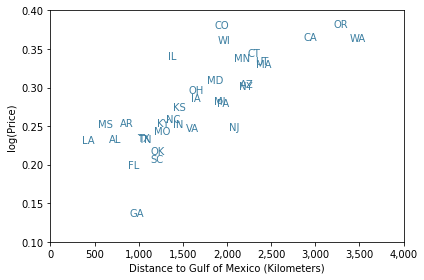

In [11]:
# Plot aggregate firm-to-firm sales by year
fig_gas_price_X_gulf_distance, ax = plt.subplots()

color = '#3B7EA1'                                                                        # Founder's Rock
ax.set_xlabel(r'Distance to Gulf of Mexico (Kilometers)')
ax.set_ylabel(r'log(Price)')
s = ax.scatter(state['distance_oil1000'], state['log_p'], alpha = 0)

ax.tick_params(axis='y')
ax.set_xticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4])
ax.set_xticklabels(['0', '500', '1,000', '1,500', '2,000', '2,500', '3,000', '3,500', '4,000'])
ax.set_yticks([0.1, 0.15, 0.20, 0.25, 0.3, 0.35, 0.4])
ax.set_yticklabels(['0.10', '0.15', '0.20', '0.25', '0.30', '0.35', '0.40'])

for i, label in enumerate(state.index.values):
    ax.annotate(label, (state['distance_oil1000'][i], state['log_p'][i]), color=color)


fig_gas_price_X_gulf_distance.tight_layout()  
# plt.savefig(graphics + 'fig_gas_price_X_gulf_distance', bbox_inches='tight', dpi=500) 

### Cost-shifters as instrumental variables
Comment on the figure above. Describe why distance to the Gulf of Mexico might be a cost-shifter, or supply-side "shock", for automobile gasoline. Argue that this variable is independent of the unobserved determinants of demand for gasoline, $U_{di}$. Argue the opposite. Describe how this variable can be used to provide a consistent estimate of $\beta_{d0}$. Please place you answers in a markdown box immediately below this one.

**ANSWER**

Distance to the Gulf of Mexico might be a cost-shifter for automobile gasoline because it can measure how difficult it can be for suppliers to move their oil products to consumers in different areas of the country. For a given quantity of oil a supplier possesses, it might still increase or decrease its price depending how how much distance it must ship its oil over. 

On one hand, we can argue that this distance to the Gulf is independent of unobserved demand determinants $U_{di}$; we can say that this variable doesn't really factor into everyday consumers' calculus of the amount of gas they need (when is the last time you thought about how far your gas came from when you were at the station putting it into your car, if ever?). 

On the other hand, perhaps the distance does correlate with $U_{di}$; any historical incidents at the Gulf could have meant long shortages without gas for farther-reaching regions, and the consumers there could have adjusted to these one-off incidents years ago and relied less on gas than consumers from closer regions have to this day.



### Estimation
1. Replicate columns 1 and 2 of Table 2 in the paper by Blundell and co-authors using OLS. Note your numbers won't match exactly because their dataset includes some restricted access data from smaller states. "Cluster" your standard errors at the state level.

In [31]:
## ANSWER TO 1.##

import statsmodels as sm   

Y = gas[['log_q']]
X = gas[['log_p','log_y']]
X = sm.api.add_constant(X)
model = lm.iv.model.IV2SLS(Y, X, None, None)
results1 = model.fit(cov_type = "clustered", clusters = gas['Postal_Code'])
print("COLUMN 1:")
print(results1)

COLUMN 1:
                            OLS Estimation Summary                            
Dep. Variable:                  log_q   R-squared:                      0.0953
Estimator:                        OLS   Adj. R-squared:                 0.0948
No. Observations:                3640   F-statistic:                    277.32
Date:                Mon, Feb 07 2022   P-value (F-stat)                0.0000
Time:                        12:01:44   Distribution:                  chi2(2)
Cov. Estimator:             clustered                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          3.6230     0.2893     12.522     0.0000      3.0559      4.1901
log_p         -0.8344     0.1982    -4.210

In [32]:
Y = gas[['log_q']]
X = gas[['log_p', 'log_y', 'log_hhr_age','log_hhsize','log_driver','total_wrkr']]
X = sm.api.add_constant(X)
model = lm.iv.model.IV2SLS(Y, X, None, None)
results = model.fit(cov_type = "clustered", clusters = gas['Postal_Code'])
print("COLUMN 2:")
print(results)

COLUMN 2:
                            OLS Estimation Summary                            
Dep. Variable:                  log_q   R-squared:                      0.1625
Estimator:                        OLS   Adj. R-squared:                 0.1611
No. Observations:                3640   F-statistic:                    816.44
Date:                Mon, Feb 07 2022   P-value (F-stat)                0.0000
Time:                        12:01:46   Distribution:                  chi2(6)
Cov. Estimator:             clustered                                         
                                                                              
                              Parameter Estimates                              
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
const           3.4679     0.3235     10.719     0.0000      2.8338      4.1020
log_p          -0.7925     0.1943    -

2. Fit the same two specifications, now using distance to the Gulf of Mexico as an excluded instrumental variable for log(Price). Again cluster your standard errors at the state level.

In [46]:
## ANSWER TO 2 ##

import linearmodels as lm

mod = lm.iv.model.IV2SLS.from_formula('log_q ~ 1 + log_y + [log_p ~ distance_oil1000]', data = gas).fit(cov_type = "clustered", clusters = gas['Postal_Code'])
print("COLUMN 1:")
print(mod.summary)

COLUMN 1:
                          IV-2SLS Estimation Summary                          
Dep. Variable:                  log_q   R-squared:                      0.0945
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0940
No. Observations:                3640   F-statistic:                    307.37
Date:                Mon, Feb 07 2022   P-value (F-stat)                0.0000
Time:                        12:43:46   Distribution:                  chi2(2)
Cov. Estimator:             clustered                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      3.6954     0.3091     11.955     0.0000      3.0895      4.3012
log_y          0.3403     0.0243     14.00

In [57]:
mod = lm.iv.model.IV2SLS.from_formula('log_q ~ 1 + log_y + log_hhr_age + log_hhsize + log_driver + total_wrkr + [log_p ~ distance_oil1000]', data = gas).fit(cov_type = "clustered", clusters = gas['Postal_Code'])
print("COLUMN 2:")
print(mod.summary)

COLUMN 2:
                          IV-2SLS Estimation Summary                          
Dep. Variable:                  log_q   R-squared:                      0.1619
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1605
No. Observations:                3640   F-statistic:                    818.49
Date:                Mon, Feb 07 2022   P-value (F-stat)                0.0000
Time:                        13:06:08   Distribution:                  chi2(6)
Cov. Estimator:             clustered                                         
                                                                              
                              Parameter Estimates                              
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
Intercept       3.5234     0.3342     10.543     0.0000      2.8684      4.1784
log_driver      0.5165     0.0750     

3. Does the coefficient on log(Price) consistently estimate the price elasiticity of demand or price elasiticity of supply? Describe another instrumental variables procedure for estimating the price elasticity not estimated here.

The coefficient on log(Price) consistently estimates the price elasticity of demand (it is less than zero, signifying a negative slope that corresponds with demand). In order to estimate the price elasticity of supply, we want to examine a regressor whose coefficient is consistently positive, taking into account its standard error. We want to identify a significant variable that is correlated with said regressor (making it endogenous) and also not correlated with log_y. If we run 2-stage least-squares and again see that this regressor's coefficient is consistently positive. Hence, we can say the coefficient is a consistent estimator of price elasticity of supply.

## Part 3: Reflection
Summarize what you have learned by completing this problem set. What parts remain uncertain or unclear? Are there topics you would like to learn more about? Place your answer in a markdown box below this one.

In Part 1, we learned about the effect supply/demand shocks have on our regression analysis. In cases where either dominate, the market will closely follow the schedule of the other. We also saw how these shocks (like the supply shock that an excise tax produces) can affect consumers and suppliers (the burden can shift depending on their respective price elasticities). 

In Part 2, we reviewed how to estimate the price elasticity of demand in the auto gasoline market using two-stage least-squares regression that involved the instrumental variable - endogenous variable pair (distance_gasoline1000, log_price). 

I wish I better understood some of Part 1, specifically how to relate endogenous prices to the consistency principle of our ols regression. That is something I definitely wish I went over at office hours if I hadn't missed it.